# Predictive Analytic:  Diabetes
- **Nama:** HILMI DATU ALLAM
- **Email:** hilmi.allam@gmail.com
- **ID Dicoding:** datuallam

- **Dataset:** https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset




# Domain Proyek
Diabetes adalah penyakit kronis yang terjadi ketika pankreas tidak memproduksi cukup insulin atau ketika tubuh tidak dapat menggunakan insulin secara efektif dan menyebabkan tingginya tingkat gula dalam darah. Pada tahun 2021, diabetes adalah penyebab langsung dari 1.6 juta kematian [1]. Di Indonesia, prevalensi diabetes pada penduduk diatas 15 tahun mencapai 2% atau sekitar 5,7 juta orang [2]. Diabetes memiliki hubungan erat dengan kadar gula darah, di mana kekurangan insulin menyebabkan peningkatan kadar glukosa darah [3]. Obesitas juga merupakan faktor risiko utama, karena dapat menyebabkan resistensi insulin yang memicu diabetes tipe 2 [4]. Selain itu, variabel seperti usia, jenis kelamin, hipertensi, penyakit jantung, riwayat merokok, BMI, kadar HbA1c, dan kadar glukosa darah telah terbukti relevan dalam penelitian diabetes, terutama dalam analitik prediktif untuk mendeteksi risiko dan diagnosis dini [3]. Meningkatnya prevalensi diabetes dan dampaknya terhadap kesehatan masyarakat menunjukkan perlunya pendekatan prediktif berbasis data untuk mengidentifikasi faktor risiko utama dan mendeteksi diabetes secara dini.

# Business Understanding

## Problem Statements

Rumusan masalah dari masalah latar belakang diatas adalah
  1. Dari berbagai faktor, faktor mana yang merupakan faktor utama terkena diabetes?
  2. Bagaimana cara mendeteksi seseorang memiliki diabetes berdasarkan data rekam medis menggunakan pendekatan analitik prediktif?
  3. Bagaimana akurasi model prediktif dapat ditingkatkan untuk mendeteksi diabetes secara dini ?

## GOALS

Berdasarkan problem statements, berikut tujuan dibuatnya proyek ini.
  1. Mengetahui faktor-faktor yang paling berpengaruh terhadap risiko diabetes berdasarkan analisis data seperti usia, jenis kelamin, hipertensi, penyakit jantung, riwayat merokok, BMI, kadar HbA1c, dan kadar glukosa darah.
  2. Menggunakan algoritma machine learning untuk mendeteksi diabetes menggunakan data rekam medis.
  3. Menemukan model terbaik berdasarkan akurasi dan recall tertinggi untuk memprediksi diabetes pada pasien

## Solution Statements

1. Analisis data untuk memahami fitur-fitur yang mempengaruhi orang terkena diabetes, dengan deskripsi statistik data untuk mengetahui korelasi antar fitur dan menerapkan teknik visualisasi data untuk memahami hubungan antara data target dan fitur lainnya.
2. Menggunakan 3 algoritma machine learning yang berbeda, yaitu Random Forest, Logistic Regression dan K-Nearest Neighbor.
3. Menggunakan confusion matrix dan recall score pada masing-masing model machine learning untuk menemukan model terbaik berdasarkan akurasi tertinggi.

## Metrik

Metrik yang akan digunakan untuk mengevaluasi seberapa baik model klasifikasi adalah confusion matrix. Confusion matrix dapat digunakan untuk menghitung akurasi dan recall.

# Data Understanding

tahap dalam proses analisis data yang bertujuan untuk memahami dataset secara mendalam sebelum melakukan analisis lebih lanjut.

## 1. Mengimport Library


Pada bagian ini kita mengimport seluruh library yang diperlukan untuk menganalisis

In [1]:
!pip install kaggle

In [2]:
!pip install google-colab


In [3]:
from google.colab import files
import os
import shutil
import textwrap
import numpy as np
import zipfile
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE





## Data Loading

tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bangdatu","key":"95a4cc85b69be7841ca3ad0ae87e80d7"}'}

In [5]:

# Buat folder .kaggle jika belum ada
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan file ke folder .kaggle
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Ubah izin file agar hanya bisa diakses oleh owner
os.chmod('/root/.kaggle/kaggle.json', 600)




In [6]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset
#membuka zip menjadi folder
with zipfile.ZipFile("diabetes-prediction-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

#membaca csv dalam folder
data = pd.read_csv("dataset/diabetes_prediction_dataset.csv",sep=",")

# Display the first few rows
data.head()

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### Deskripsi Variabel

Variabel | Keterangan
----------|----------
gender| jenis kelamin
age |  umur dalam decimal
hypertension| 0: tidak hipertensi, 1: hipertensi
heart_disease| 0: tidak ada penyakit jantung, 1: penyakit jantung
smoking_history|6 kategori: not current (tidak merokok saat ini), former (mantan perokok), No Info (tidak ada informasi), current (merokok saat ini), never (tidak pernah merokok), dan ever (pernah merokok).
bmi | ukuran lemak tubuh berdasarkan berat dan tinggi. Rentang BMI dalam dataset adalah 10,16 hingga 71,55.
HbA1c_level| ukuran rata-rata kadar gula darah seseorang selama 2-3 bulan terakhir.
blood_glucose_level | Jumlah glukosa dalam aliran darah pada waktu tertentu.
diabetes | 0: tidak diabetes, 1: diabetes




In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Terdapat 2 variabel bertipe string, 3 variabel bertipe float64 dan 4 variabel bertipe int64

In [8]:
data['age'] = np.where(data['age'] < 1, np.ceil(data['age']), data['age'].round()).astype(int)

Data age diubah dari desimal menjadi integer dengan umur yang dibawah 1 tahun dianggap 1 tahun agar tidak ada yang memiliki umur 0. Hal ini dapat mempermudah analisis kedepannya

In [9]:
data.shape

(100000, 9)

Dari code diatas didapat :

| Jumlah Baris | Jumlah Kolom |
--------|-------
| 70000 | 12 |

In [10]:
df = pd.DataFrame(data)

### Deskripsi Statistik dari Data

In [11]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.889990,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.509318,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,1.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count : Jumlah sampel pada data.
- Mean : Nilai rata-rata.
- Std : Standar deviasi.
- Min : nilai minimum setiap kolom.
- 25% : Kuartil pertama adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% : Kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% : Kuartil ketiga.
- Max : Nilai maksimum.

Dari informasi diatas, disimpulkan bahwa data ini mencakup orang yang berumu 1-80 tahun dengan BMI rentang 10-95. Kadar gula di aliran darah 2-3 bulan terakhir (HbA1c_level) responden berada di kisaran 3.5 hingga 9 persen, sedangkan kadar gula di aliran saat data ini diambil berada pada kisaran 80 hingga 300 mg/dL

## Exploratory Data Analysis

### Univariate Analysis

In [12]:
fitur_numerik=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fitur_kategorikal=['gender', 'smoking_history', 'hypertension', 'heart_disease', 'diabetes']

In [13]:
count = df[fitur_kategorikal].value_counts()

jumlah_unik =df[fitur_kategorikal].nunique()
nilai_unik = df[fitur_kategorikal].apply(lambda col: col.unique())
pd.DataFrame({
    'Jumlah Unik': jumlah_unik,
    'Nilai Unik': nilai_unik
})

,Jumlah Unik,Nilai Unik
gender,3,"[Female, Male, Other]"
smoking_history,6,"[never, No Info, current, former, ever, not cu..."
hypertension,2,"[0, 1]"
heart_disease,2,"[1, 0]"
diabetes,2,"[0, 1]"


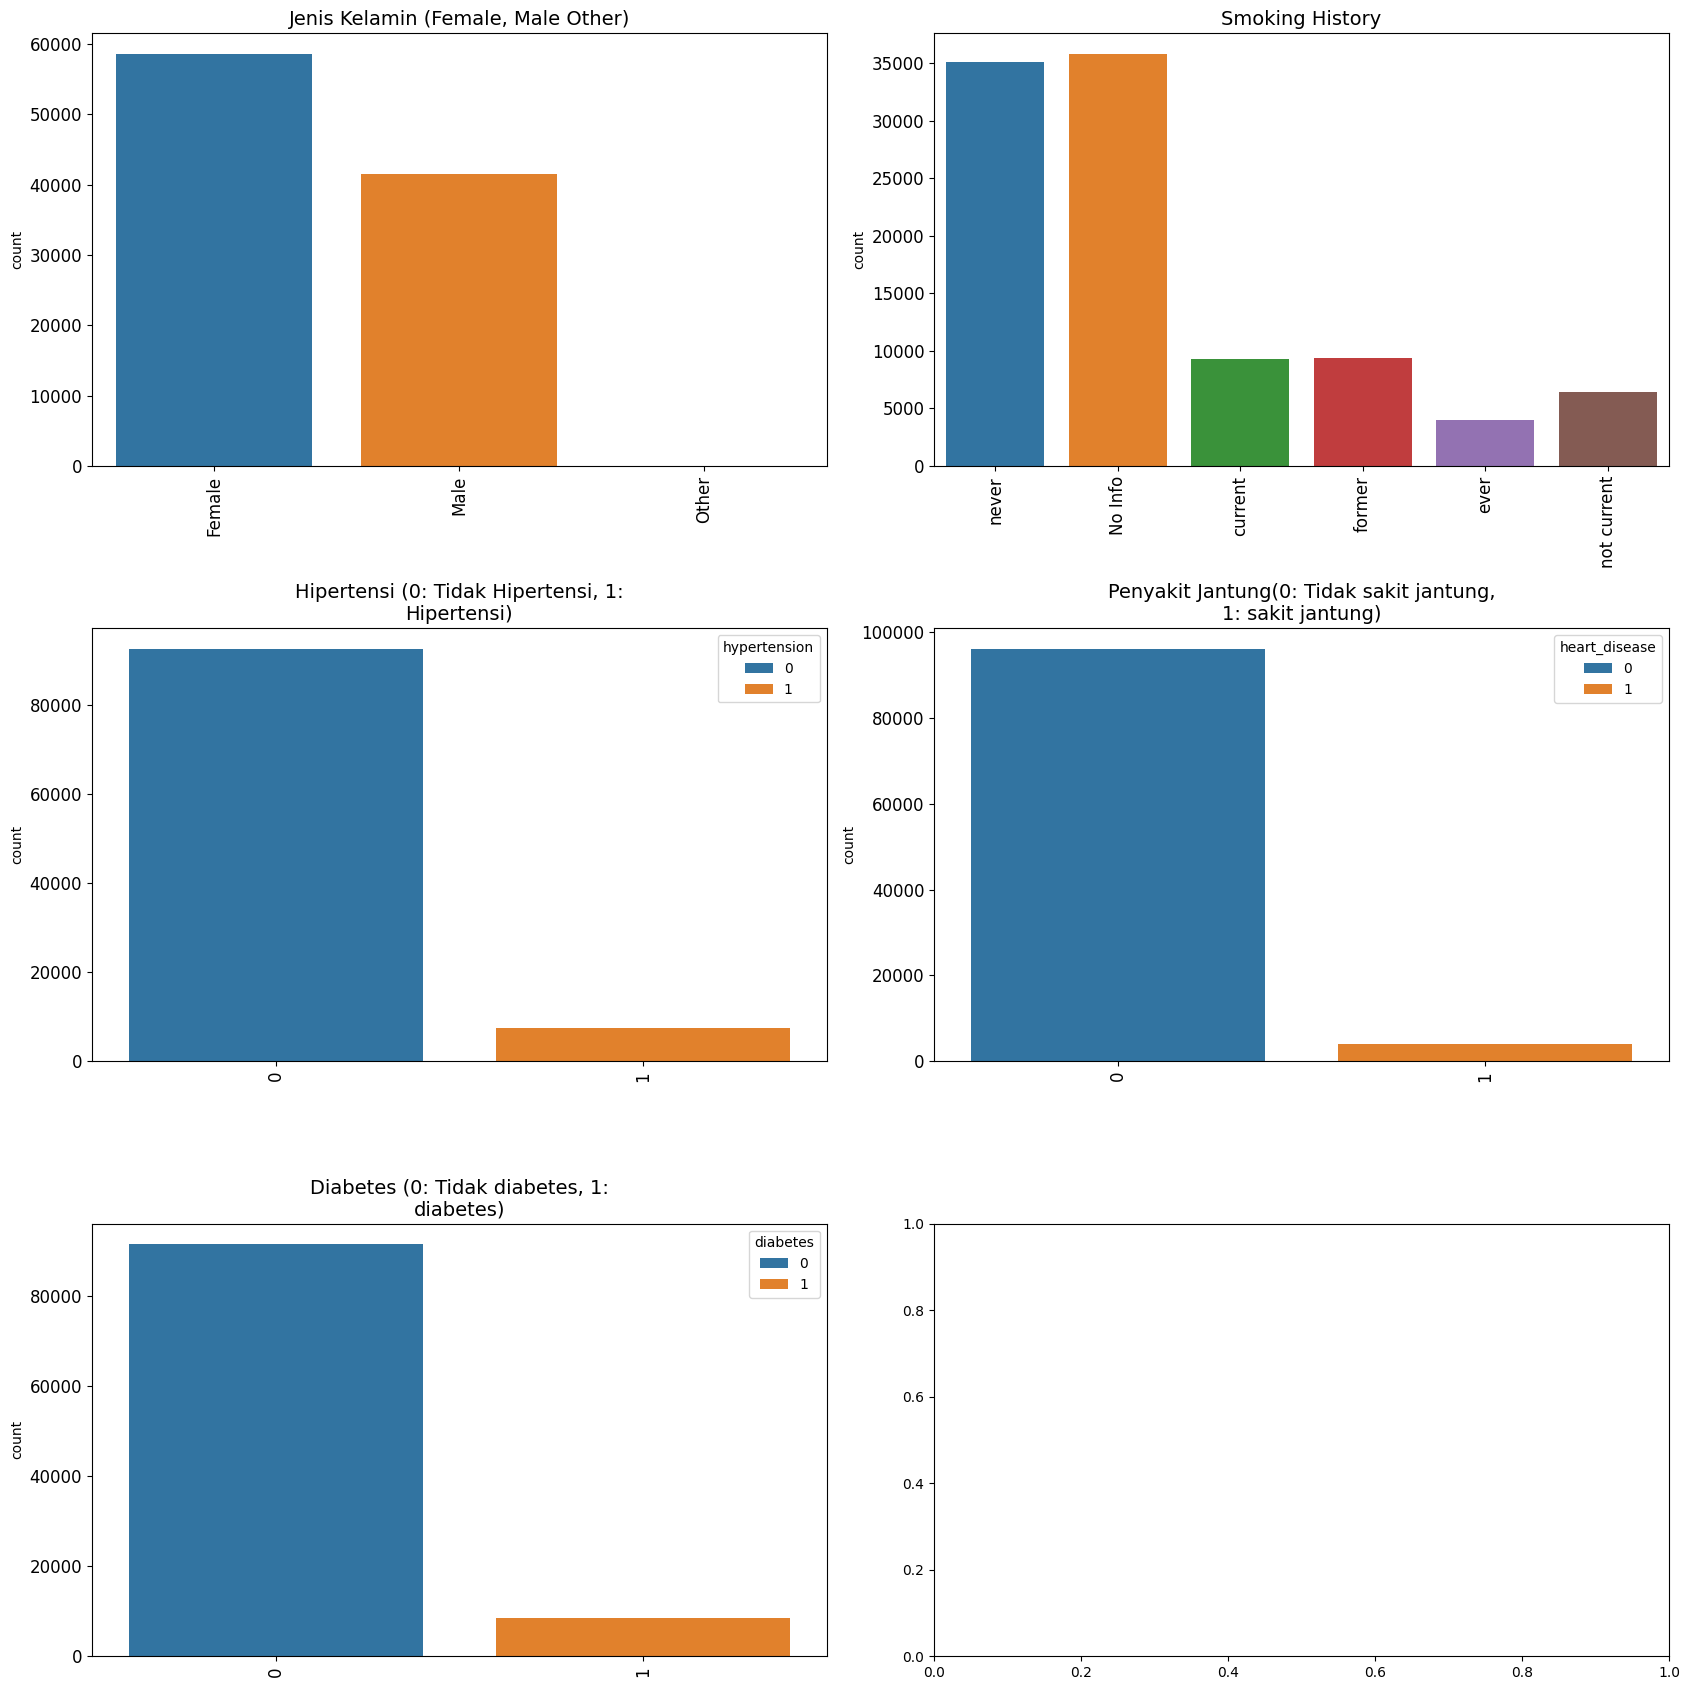

In [14]:
# Membentuk plot dengan subplot sejumlah 6 berukuran 3 x 2
fig, axes = plt.subplots(3, 2, figsize = (17, 17))

# Mengubah array multi dimensi menjadi array 1 dimensi
axes = axes.flatten()

# Mendeskripsikan kolom-kolom kategorikal yang akan digunakan
deskripsi_kolom_kategorikal = ["Jenis Kelamin (Female, Male Other)",
                                "Smoking History",
                                "Hipertensi (0: Tidak Hipertensi, 1: Hipertensi)",
                                "Penyakit Jantung(0: Tidak sakit jantung, 1: sakit jantung)",
                                "Diabetes (0: Tidak diabetes, 1: diabetes)"
]

# Membentuk plot jumlah dalam bentuk bar plot untuk masing-masing kolom
for i, kolom in enumerate(df[fitur_kategorikal].columns):
    sns.countplot(x = kolom, data = data, ax = axes[i], hue = kolom)

    # Menambahkan judul untuk masing-masing plot
    judul = "\n".join(textwrap.wrap(f"{deskripsi_kolom_kategorikal[i]}", width = 40))
    axes[i].set_title(judul)
    axes[i].title.set_size(14)

    # Mengatur label x
    axes[i].tick_params(axis = "x", labelrotation = 90)
    axes[i].tick_params(axis = "both", which = "major", labelsize = 12)
    axes[i].set_xlabel("")

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari plot-plot diatas didapat informasi:
  1. Dari Plot Gender, responden mayoritas perempuan dengan sangat sedikit yang menolak menjawab yaitu other
  2. Dari plot Smoking History, mayoritas responden tidak pernah merokok dan no info.
  3. Dari plot Hipertensi, mayoritas tidak hipertensi
  4. Dari plot Penyakit Jantung, mayoritas tidak sakit jantung
  5. Dari plot Diabetes, mayoritas tidak diabetes

  Beberapa kelas sangat imbalance, nantinya akan dilakukan oversampling sebelum training
  Untuk kedepannya gender "Other" akan di drop karena hanya berjumlah sangat sedikit.

In [15]:
df = df[df['gender'] != 'Other']


Kode ini akan ngedrop semua baris dengan gender Other

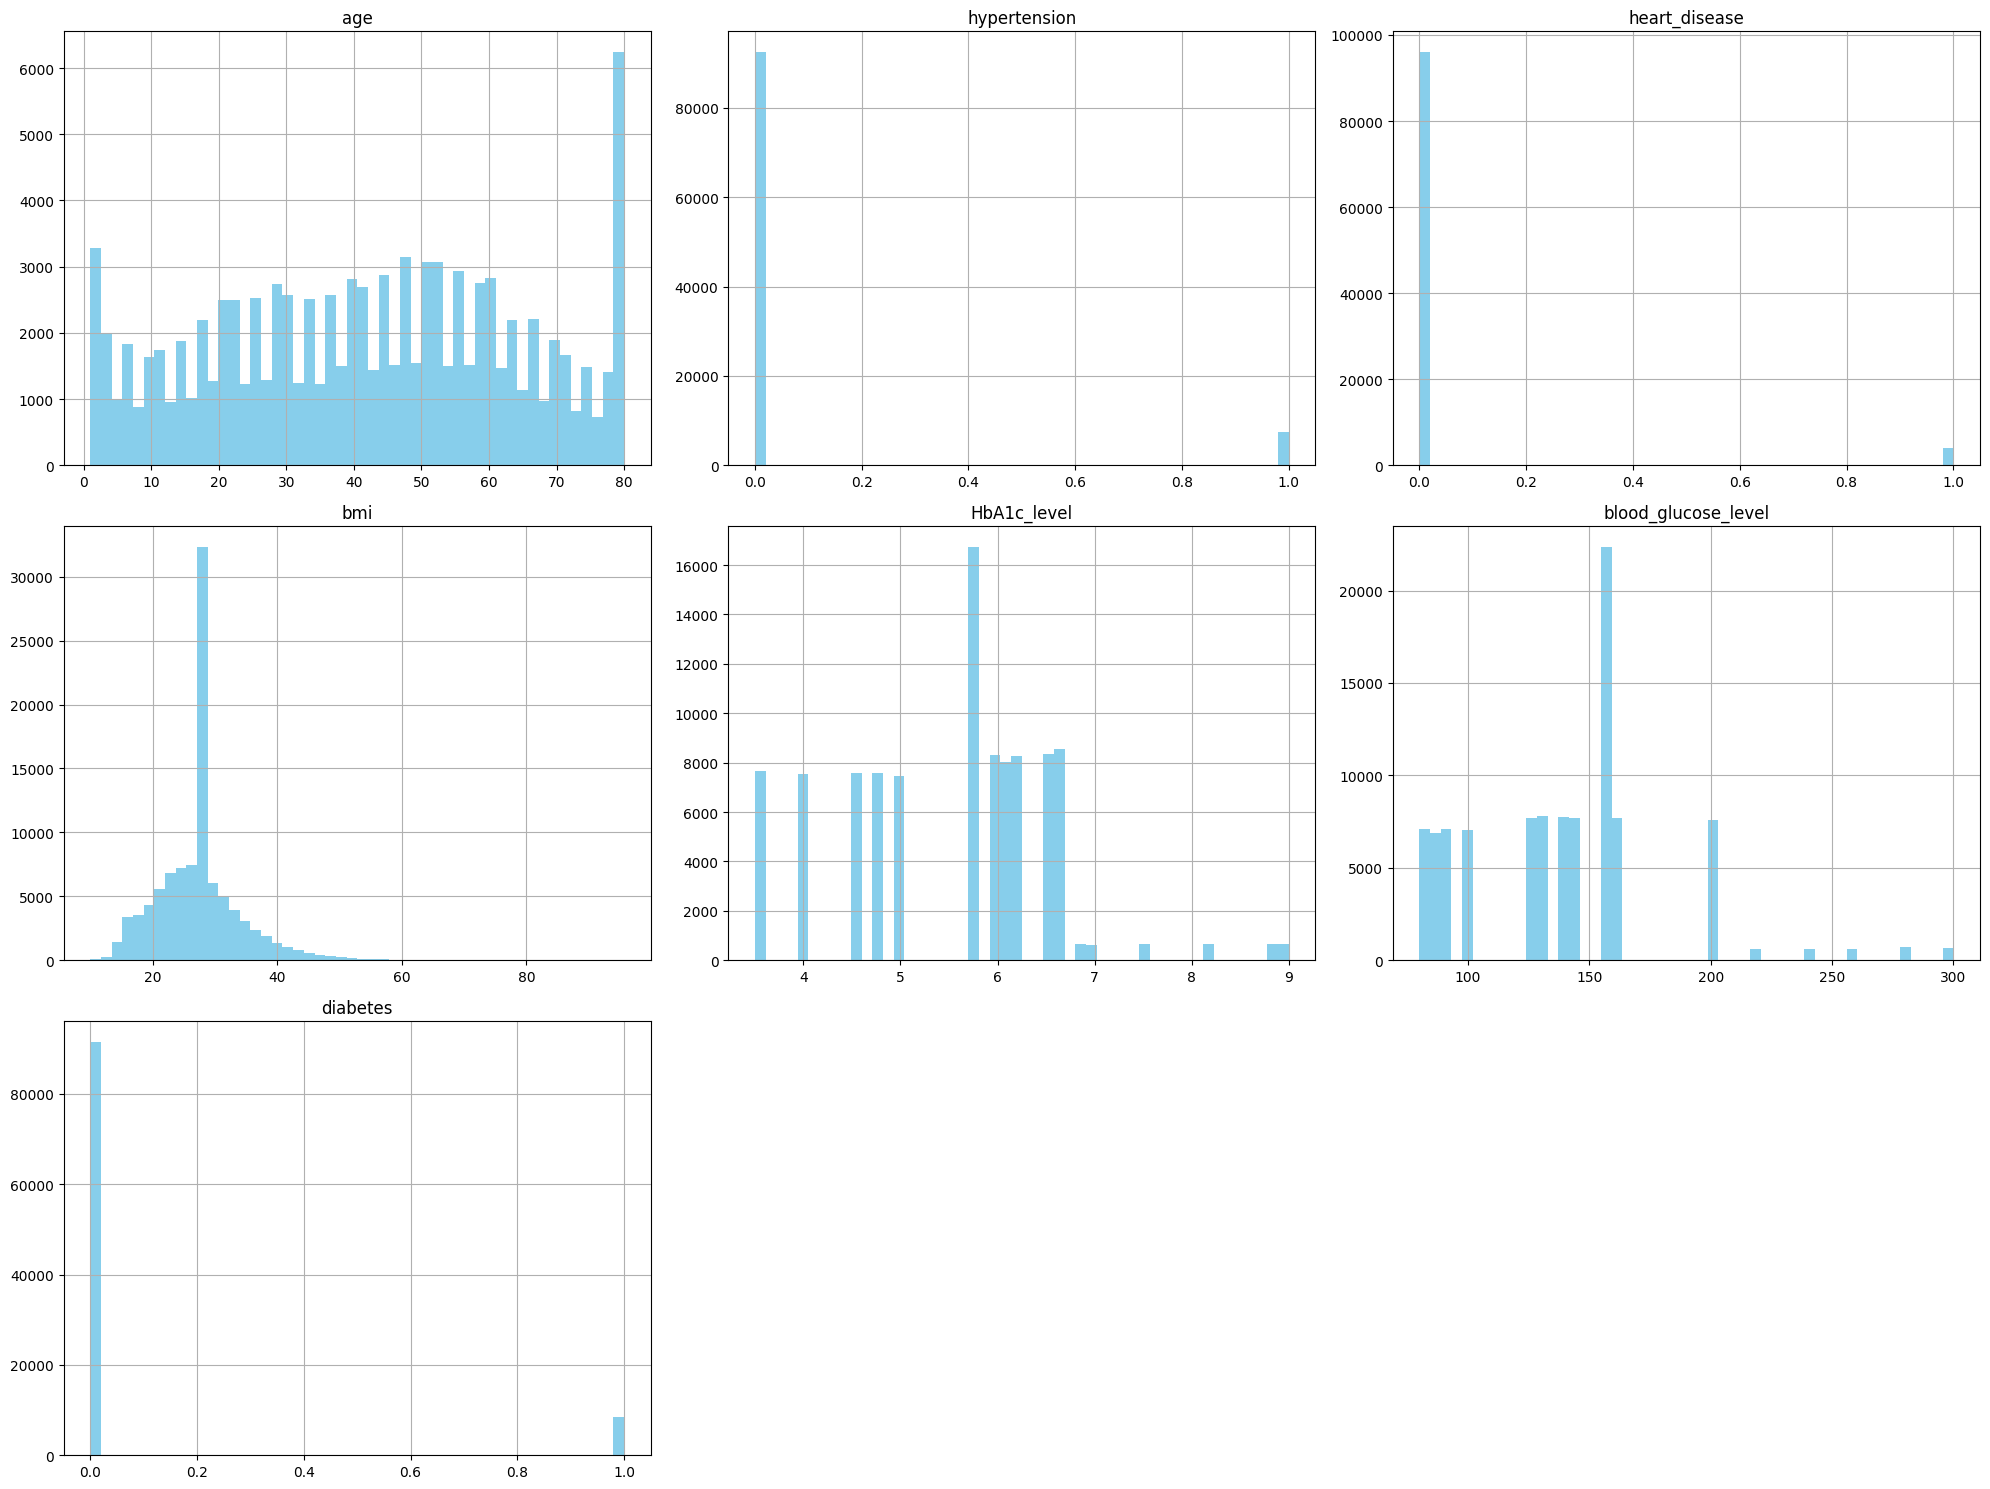

In [16]:
df.hist(bins=50, figsize=(20,15), color= 'skyblue')

# Mengatur susunan agar tidak berhimpitan
plt.tight_layout()

#menampilkan plot
plt.show()

In [17]:
skewness = df.skew(numeric_only=True)

summary = pd.DataFrame({
    'Skewness': skewness,
    'Kategori': skewness.apply(lambda x:
        'Miring Kiri' if x < -0.5 else
        'Miring Kanan' if x > 0.5 else
        'Cukup Normal')
})

print(summary)


                     Skewness      Kategori
age                 -0.050892  Cukup Normal
hypertension         3.230926  Miring Kanan
heart_disease        4.733390  Miring Kanan
bmi                  1.044037  Miring Kanan
HbA1c_level         -0.066727  Cukup Normal
blood_glucose_level  0.821777  Miring Kanan
diabetes             2.975864  Miring Kanan


Dari Gambar maupun output diatas didapat informasi:
1. Plot Histogram dari **HbA1c_level** dan **Age* berdistribusi cukup normal
2. Plot Histogram dari **Hypertension**, **heart_disease**, **bmi**, **blood_glucose_level** dan **diabetes** berdistribusi miring ke kanan (right skewed)

### Multivariate Analysis

####Membandingkan diabetes dengan gender

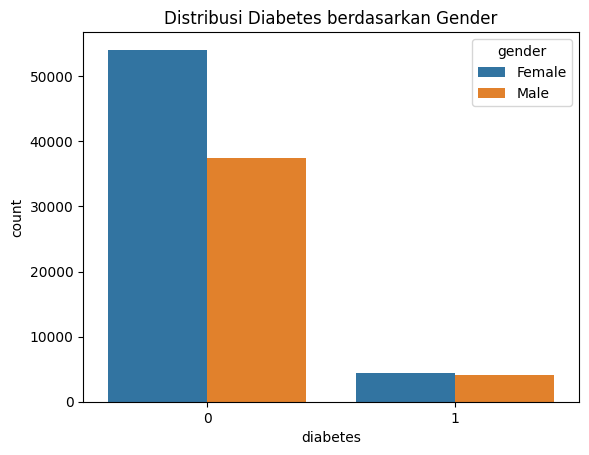

In [18]:
sns.countplot(data=df, x='diabetes', hue='gender')
plt.title('Distribusi Diabetes berdasarkan Gender')
plt.show()

Dari Plot diatas didapat informasi:
1. Jumlah perempuan tanpa diabetes jauh lebih banyak daripada laki-laki tanpa diabetes.
2. Jumlah perempuan dengan diabetes hampir sama dengan jumlah laki-laki dengan diabetes.

####Membandingkan diabetes dengan usia

<ipython-input-19-29935d90decc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_strip, x="age", y="diabetes", jitter=0.3, alpha=0.5, palette="Set2")


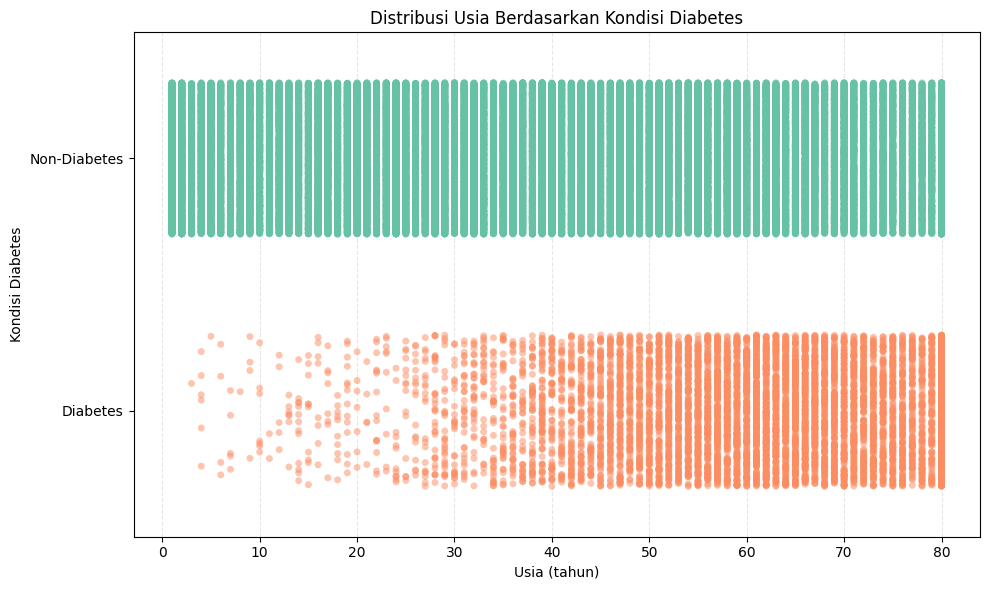

In [19]:
plt.figure(figsize=(10, 6))
df_strip = df.copy()
df_strip['diabetes']=df['diabetes'].apply(lambda x: 'Diabetes' if x==1 else 'Non-Diabetes')
sns.stripplot(data=df_strip, x="age", y="diabetes", jitter=0.3, alpha=0.5, palette="Set2")

plt.title("Distribusi Usia Berdasarkan Kondisi Diabetes")
plt.xlabel("Usia (tahun)")
plt.ylabel("Kondisi Diabetes")
plt.grid(True, axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Dari gambar diatas:
1. Seluruh responden non diabates direntang 1-80
2. Seluruh responden diabetes mulai banyak frekuensinya pada umur 20-80. Dengan beberapa outlier di rentang 1-29


#### Membandingkan diabetes dengan tingkat kadar gula saat ini

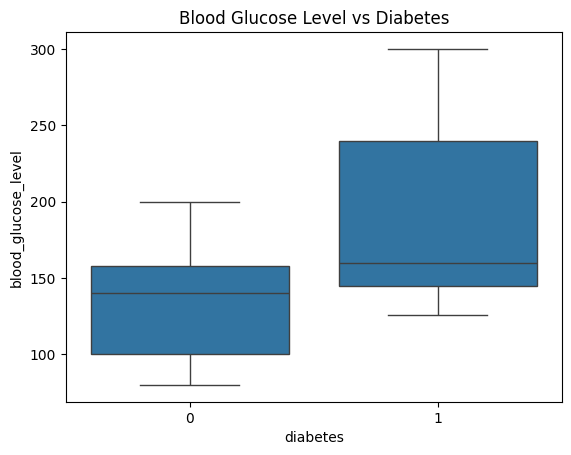

In [20]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

Dari boxplot diatas:
1. Pasien dengan diabetes memiliki median level glukosa darah yang lebih tinggi dibandingkan pasien tanpa diabetes.
2. Distribusi glukosa pada penderita diabetes lebih melebar dan mencakup nilai yang lebih tinggi hingga 300.
3. Ppasien tanpa diabetes memiliki glukosa darah yang lebih terkonsentrasi di bawah 200.

#### Membandingkan diabetes dengan HbA1c_level (tingkat gula dalam darah 2-3 bulan terakhir)

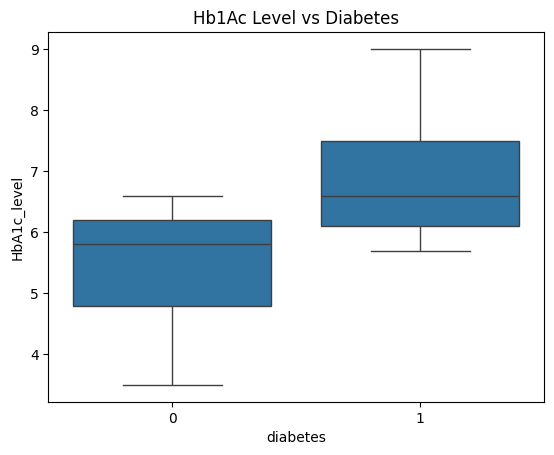

In [21]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('Hb1Ac Level vs Diabetes')
plt.show()

Dari boxplot diatas:
1. Penderita diabetes memiliki HbA1c yang lebih tinggi dibandingkan non-diabetes.

2. Median HbA1c penderita diabetes sekitar 6.5–7.5, sedangkan non-diabetesi sekitar 5.5–6.

3. Hampir seluruh penderita diabetes memiliki HbA1c di atas 6

####Membuat Correlation Matrix

In [22]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90,0
99996,Female,2,0,0,No Info,17.37,6.5,100,0
99997,Male,66,0,0,former,27.83,5.7,155,0
99998,Female,24,0,0,never,35.42,4.0,100,0


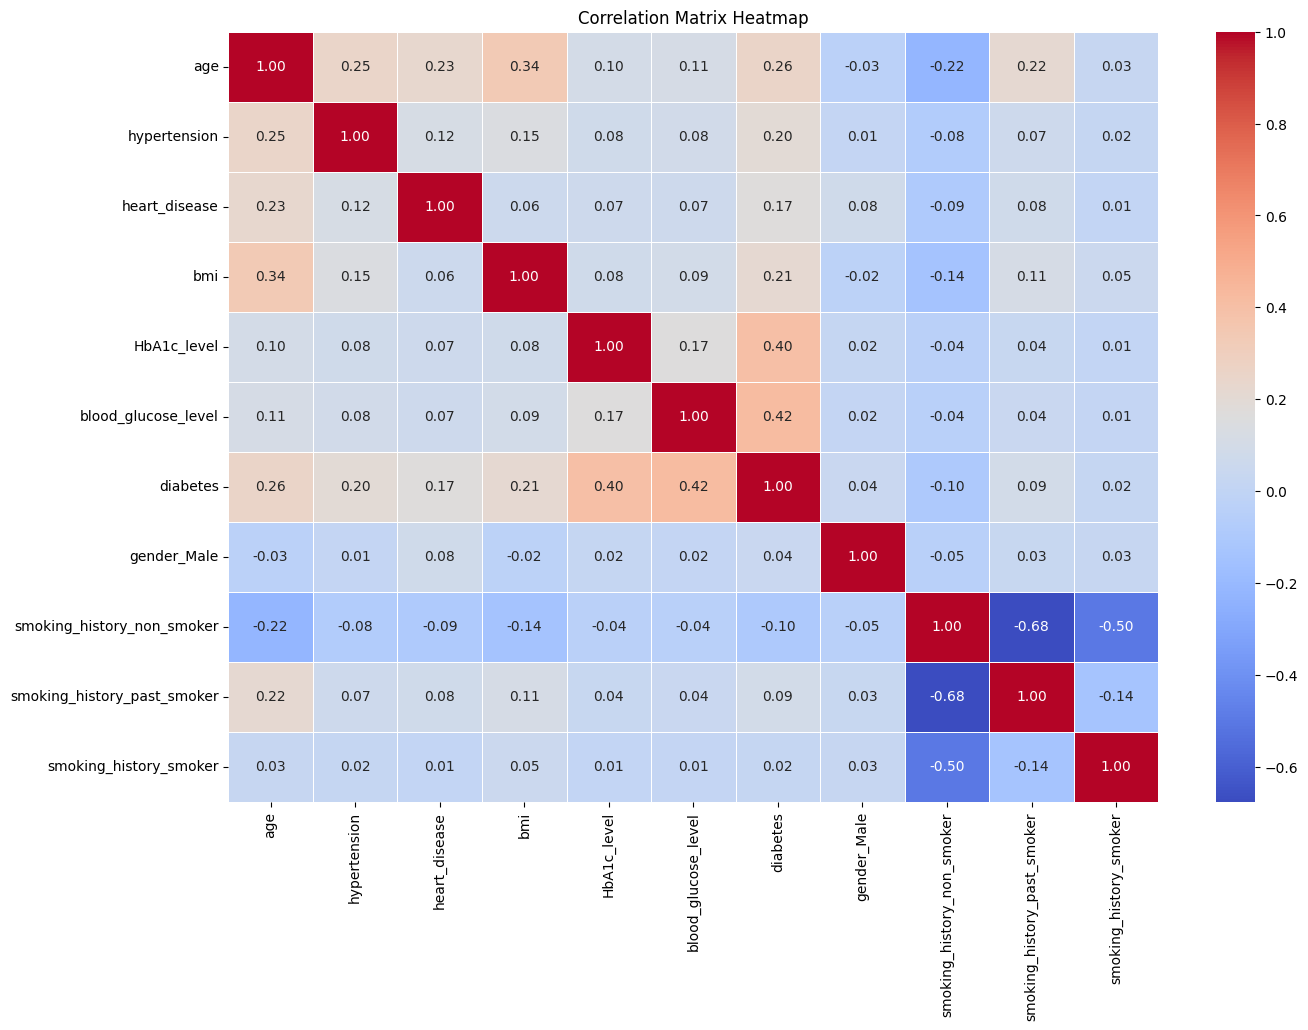

In [23]:
# Pengelompokan smoking_history
df['smoking_history'] = df['smoking_history'].replace({
    'former': 'past_smoker', 'current': 'smoker', 'current_smoker': 'past_smoker', 'not current': 'past_smoker',
    'never': 'non_smoker', 'No Info': 'non_smoker'
})
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

# Graph I: Correlation Matrix Heatmap
plt.figure(figsize=(15, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Graph II: Correlation with 'diabetes' (target variable)
corr = df_encoded.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)


Dari Correlation Matrix diatas:
1. Diabetes memiliki korelasi tinggi dengan blood_glucose_level dan HbA1c_level. Hal ini menunjukkan 2 variabel ini merupakan prediktor yang kuat
2. age, bmi, hypertension dan heart_disease memiliki korelasi positif yang lumayan. Hal ini menandakan bahwa usia yang lebih tua, indeks masa tubuh yang tinggi, hipertensi dan penyakit jantung berkontribusi pada diabetes.


# Data Preparation

## Data Cleaning

Menangani Data Duplikat

In [24]:
df.duplicated().sum()

np.int64(6001)

In [25]:
df_clean=df.drop_duplicates()

Terdapat 6001 data duplikat, kemudian kita menghapusnya dengan .drop_duplicates()

Menangani Missing Value

In [26]:
df_clean.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Tidak terdapat missing value pada dataset kita

Menangani Value 0

In [27]:
column_names = ['gender','age','smoking_history','bmi','HbA1c_level','blood_glucose_level']
for x in column_names:
  print(x, (df_clean[x]==0).sum())

gender 0
age 0
smoking_history 0
bmi 0
HbA1c_level 0
blood_glucose_level 0


Setelah di cek. Tidak ada value 0 pada kolom numerik kita. Value 0 pada diabetes, hypertension dan heart_disease itu wajar karena mereka kategorikal

##Encode Kolom kategorikal dan One Hot Encoding

Encoding dilakukan terhadap smoking_history dan one hot encoding dilakukan terhadap gender

In [28]:
le = LabelEncoder()
df_clean = pd.get_dummies(df_clean,columns=['smoking_history'],drop_first=True)
df_clean['gender']= le.fit_transform(df_clean['gender'])

In [29]:
df_clean.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_non_smoker,smoking_history_past_smoker,smoking_history_smoker
0,0,80,0,1,25.19,6.6,140,0,True,False,False
1,0,54,0,0,27.32,6.6,80,0,True,False,False
2,1,28,0,0,27.32,5.7,158,0,True,False,False
3,0,36,0,0,23.45,5.0,155,0,False,False,True
4,1,76,1,1,20.14,4.8,155,0,False,False,True


## Split Train Test

Selanjutnya, karena target kita adalah variabel **diabetes** maka kita akan membuang kolom tersebut dari data dan assign kolom tersebut ke variabel baru.

In [30]:
X = df_clean.drop('diabetes',axis=1)
y = df_clean['diabetes']
# Membentuk data training dan data testing dengan komposisi 80% : 20 % dan dirandom setiap dijalankan ulang
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=22)

Lalu, kita membagi data menjadi 2, yaitu
* Data training sebesar 80% untuk melatih model
* Data testing sebesar 20% untuk menguji model

In [31]:
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (75184, 10)
Ukuran X_test:  (18797, 10)
Ukuran y_train:  (75184,)
Ukuran y_test:  (18797,)


##Oversampling

Karena data mengalami imbalance yang sangat tumpang tindih maka perlu dilakukan oversamplnig

In [32]:

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [33]:

print("Ukuran X_train_balanced: ", X_train_balanced.shape)
print("Ukuran y_train_balanced: ", y_train_balanced.shape)


Ukuran X_train_balanced:  (136816, 10)
Ukuran y_train_balanced:  (136816,)


In [54]:
y_train.value_counts()

,count
diabetes,
0,68408
1,6776


In [34]:
y_train_balanced.value_counts()


,count
diabetes,
0,68408
1,68408


Sekarang data sudah seimbang

##Standardisasi

In [35]:
# scaling untuk data training
numerical_features= ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']
scaler = StandardScaler()
scaler.fit(X_train_balanced[numerical_features])
X_train_balanced[numerical_features] = scaler.transform(X_train_balanced.loc[:, numerical_features])
X_train_balanced[numerical_features].head()

,age,bmi,HbA1c_level,blood_glucose_level,hypertension,heart_disease
0,0.734166,0.395917,-1.349183,0.649447,-0.294631,-0.203411
1,0.081167,-0.283705,-0.283492,0.649447,-0.294631,-0.203411
2,0.034524,-0.024482,0.044413,-1.287839,3.394078,-0.203411
3,-0.851689,-0.283705,-0.365468,-0.090244,-0.294631,-0.203411
4,1.014023,-0.283705,-0.037563,-1.111722,-0.294631,-0.203411


Scaler di fit menggunakan data train. data train di standardisasi menggunakan scaler yang di fit tadi

In [36]:
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,age,bmi,HbA1c_level,blood_glucose_level,hypertension,heart_disease
48738,1.387166,-0.243411,-0.283492,-0.407254,-0.294631,-0.203411
95709,-1.831188,-1.821586,0.044413,-0.055020,-0.294631,-0.203411
19542,-1.038260,-0.283705,-1.103254,-0.143079,-0.294631,-0.203411
21222,1.293880,-0.272960,-0.283492,0.649447,-0.294631,-0.203411
26361,1.060666,-0.283705,-2.168945,-0.583371,-0.294631,-0.203411


Data testing di transform menggunakan scaler yang di fit menggunakan data training agar menghindari data leakage

#Model

In [72]:
def evaluasi_model(y_true, y_pred, title):
    # Daftar label kelas
    target_nama = ['Non Diabetes', 'Diabetes']

    # Menampilkan laporan klasifikasi
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred, target_names=target_nama))

    # Menampilkan akurasi
    acc = accuracy_score(y_true, y_pred)
    print(f"=== Accuracy: {acc:.4f} ===")

    # Menampilkan confusion matrix
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)

    # Atur label sumbu
    ax.xaxis.set_ticklabels(target_nama, rotation=90)
    ax.yaxis.set_ticklabels(target_nama)

    # Hilangkan grid
    ax.grid(False)

    # Tambahkan judul
    ax.set_title(title)
    plt.show()

Logistic Regression

In [73]:


model = LogisticRegression(solver='liblinear',random_state=50)
model.fit(X_train_balanced,y_train_balanced)

LogisticRegression(random_state=50, solver='liblinear')

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.98      0.91      0.94     17108
    Diabetes       0.47      0.81      0.60      1689

    accuracy                           0.90     18797
   macro avg       0.73      0.86      0.77     18797
weighted avg       0.93      0.90      0.91     18797

=== Accuracy: 0.9018 ===


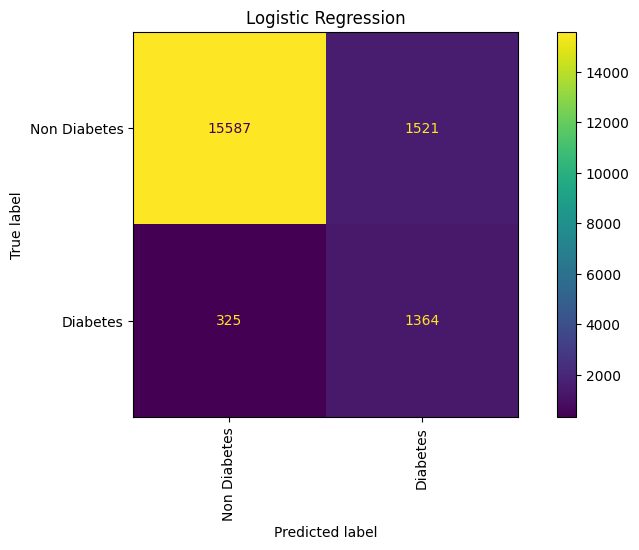

In [ ]:
y_pred_lr = model.predict(X_test)
akurasi_lr= accuracy_score(y_test, y_pred_lr)
print("Akurasi dari model logistic regression adalah {akurasi_lr}")
evaluasi_model(y_test, y_pred_lr, 'Logistic Regression')

Menggunakan Logistic Regression :

1. 15590 responden nondiabetes telah diklasifikasikan dengan benar
2. 1364 responden diabetes telah diklasifikasikan dengan benar
3. 1518 responden nondiabetes diklasifikasikan sebagai responden diabetes (False Positif)
4. 325 responden diabetes diklasifikasikan sebagai responden nondiabetes (False negatif)

KNN

In [75]:


knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train_balanced,y_train_balanced)

KNeighborsClassifier(n_neighbors=21)

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.98      0.92      0.95     17108
    Diabetes       0.49      0.82      0.62      1689

    accuracy                           0.91     18797
   macro avg       0.74      0.87      0.78     18797
weighted avg       0.94      0.91      0.92     18797

=== Accuracy: 0.9085 ===


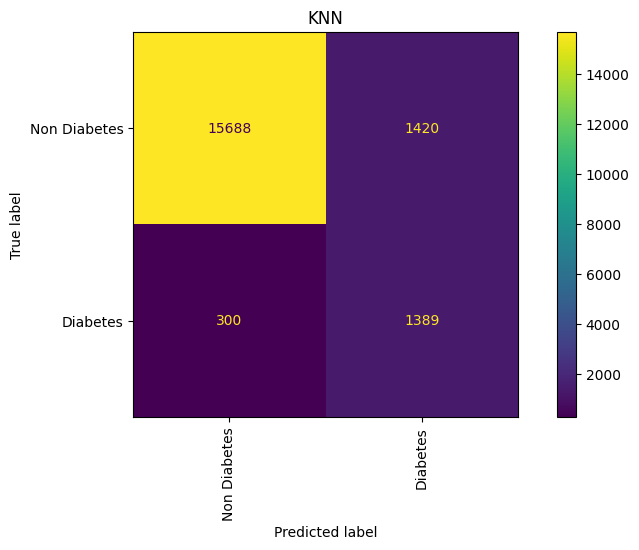

In [ ]:
y_pred_knn = knn.predict(X_test)
akurasi_knn= accuracy_score(y_test, y_pred_knn)
print("Akurasi dari model KNN adalah {akurasi_knn}")

evaluasi_model(y_test, y_pred_knn, 'KNN')

Menggunakan K-Nearest Neighbor :

1. 15981 responden nondiabetes telah diklasifikasikan dengan benar
2. 1329 responden diabetes telah diklasifikasikan dengan benar
3. 1127 responden nondiabetes diklasifikasikan sebagai responden diabetes (False Positif)
4. 360 responden diabetes diklasifikasikan sebagai responden nondiabetes (False negatif)

Random Forest

In [77]:

rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(random_state=42)

=== Classification Report ===
              precision    recall  f1-score   support

Non Diabetes       0.97      0.98      0.98     17108
    Diabetes       0.79      0.73      0.76      1689

    accuracy                           0.96     18797
   macro avg       0.88      0.85      0.87     18797
weighted avg       0.96      0.96      0.96     18797

=== Accuracy: 0.9586 ===


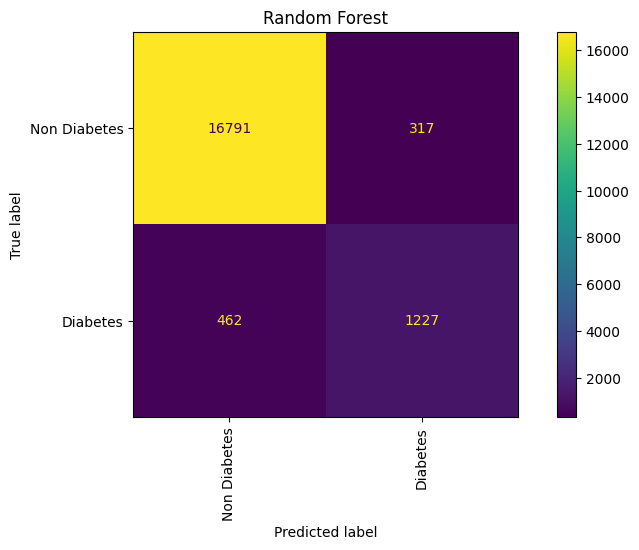

In [ ]:
y_pred_rf=rf.predict(X_test)
akurasi_rf= accuracy_score(y_test, y_pred_rf)
print("Akurasi dari model random forest adalah {akurasi_rf}")

evaluasi_model(y_test, y_pred_rf, 'Random Forest')

Menggunakan Random Forest :

1. 16791 responden nondiabetes telah diklasifikasikan dengan benar
2. 1227 responden diabetes telah diklasifikasikan dengan benar
3. 317 responden nondiabetes diklasifikasikan sebagai responden diabetes (False Positif)
4. 462 responden diabetes diklasifikasikan sebagai responden nondiabetes (False negatif)

Tingkat Penting Fitur


Feature Importance:
                       Feature  Importance
5                  HbA1c_level    0.411045
6          blood_glucose_level    0.260004
1                          age    0.156726
4                          bmi    0.095042
7   smoking_history_non_smoker    0.027202
8  smoking_history_past_smoker    0.024689
9       smoking_history_smoker    0.012661
0                       gender    0.006463
2                 hypertension    0.003741
3                heart_disease    0.002428


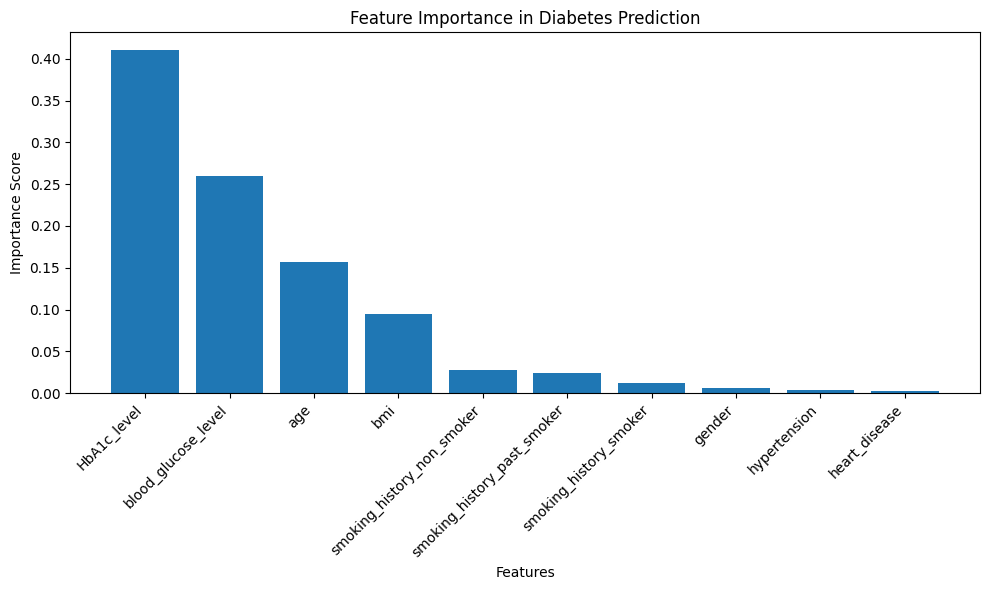

In [44]:
feature_importance = pd.DataFrame({
    'Feature': X_train_balanced.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

Fitur paling penting menurut random forest adalah HbA1c_level yaitu tingkat gula dalam darah 2-3 bulan terakhir

# Evaluasi

# Referensi

[1] World Health Organization. (2021). Diabetes Fact Sheet. https://www.who.int/news-room/fact-sheets/detail/diabetes

[2] Kementerian Kesehatan Republik Indonesia. (2018). Riset Kesehatan Dasar (Riskesdas) 2018. Jakarta: Badan Penelitian dan Pengembangan Kesehatan.

[3] Kavakiotis, I., et al. (2017). Machine Learning and Data Mining Methods in Diabetes Research. Computational and Structural Biotechnology Journal, 15, 104-116.

[4] Abdullah, A., Peeters, A., de Courten, M., & Stoelwinder, J. (2010). The magnitude of association between overweight and obesity and the risk of diabetes: a meta-analysis of prospective cohort studies. Diabetes research and clinical practice, 89(3), 309-319.
